In [1]:
import os
from pandas import concat, Series, DataFrame, options
from numpy import inf
import matplotlib.pyplot as plt

from project.model import get_inputs
from project.utils import cumulated_plot, cumulated_plots

In [2]:
os.getcwd()

'/Users/lucas/PycharmProjects/Res-IRF4/project/analysis/mac_curve'

In [2]:
path = 'output/static'
if not os.path.isdir(path):
    os.mkdir(path)

In [3]:
insulation = {'Wall': (True, False, False, False), 'Floor': (False, True, False, False), 'Roof': (False, False, True, False), 'Windows': (False, False, False, True), 'Global': (True, True, True, True)}

### Loading inputs

In [4]:
output = get_inputs(path)
buildings = output['buildings']
energy_prices = output['energy_prices']
cost_insulation = output['cost_insulation']
carbon_emission = output['carbon_emission']
carbon_value_kwh = output['carbon_value_kwh']
health_cost = output['health_cost']

2022-11-10 14:47:08,256 - 56552 - log_static - INFO - Creating AgentBuildings object


In [5]:
output.keys()

dict_keys(['buildings', 'energy_prices', 'cost_insulation', 'carbon_emission', 'carbon_value_kwh', 'health_cost'])

## Calculating potential
1. Initial consumption of the building stock
2. Potential energy reduction after insulation measures
3. Cost of insulation measures
4. Cost-efficiency of potential measures
5. Marginal Abatement Cost (MAC) curve

In [6]:
output = buildings.mitigation_potential(energy_prices, cost_insulation, carbon_emission, carbon_value_kwh)

In [7]:
output.keys()

dict_keys(['Stock (dwellings)', 'Consumption before (kWh/dwelling)', 'Consumption before (kWh/segment)', 'Consumption actual before (kWh/dwelling)', 'Consumption actual before (kWh/segment)', 'Consumption actual after (kWh/dwelling)', 'Consumption actual after (kWh/segment)', 'Consumption saved (kWh/dwelling)', 'Consumption saved (kWh/segment)', 'Consumption actual saved (kWh/dwelling)', 'Consumption actual saved (kWh/segment)', 'Emission before (gCO2/dwelling)', 'Emission after (gCO2/dwelling)', 'Emission saved (gCO2/dwelling)', 'Emission value before (euro/dwelling)', 'Emission value after (euro/dwelling)', 'Emission value saved (euro/dwelling)', 'Cost insulation (euro/dwelling)', 'Cost insulation (euro/segment)', 'Bill before (euro/dwelling)', 'Bill after (euro/dwelling)', 'Bill saved (euro/dwelling)', 'Best NPV', 'Max consumption saved'])

In [8]:
discount_rate, lifetime = 0.05, 30
discount_factor = (1 - (1 + discount_rate) ** -lifetime) / discount_rate
print(discount_factor)

15.372451026882842


In [9]:
result = dict()

Index(['bill_saved', 'cost', 'consumption_saved', 'consumption_saved_agg',
       'consumption_actual_saved_agg', 'criteria', 'columns',
       'consumption_saved_sum', 'consumption_saved_agg_sum',
       'cost_consumption'],
      dtype='object')


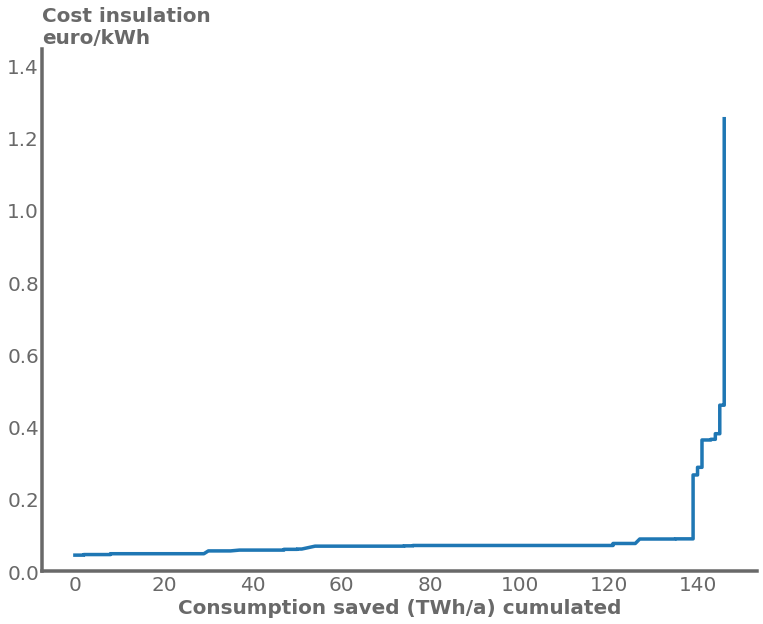

Consumption conventional initial: 351 TWh/a
Existing  Occupancy status  Income owner  Income tenant  Housing type  Heating system               Wall  Floor  Roof  Windows
True      Owner-occupied    C1            C1             Multi-family  Electricity-Heat pump water  0.1   0.5    0.1   1.6        1.253313
          Privately rented  C3            C3             Multi-family  Electricity-Heat pump water  0.1   0.5    0.1   1.6        1.253313
                            C5            C4             Multi-family  Electricity-Heat pump water  0.1   0.5    0.1   1.6        1.253313
                            C3            C1             Multi-family  Electricity-Heat pump water  0.1   0.5    0.1   1.6        1.253313
                            C4            C2             Multi-family  Electricity-Heat pump water  0.1   0.5    0.1   1.6        1.253313
          Owner-occupied    C3            C3             Multi-family  Electricity-Heat pump water  0.1   0.5    0.1   1.6        1.25

In [10]:
df = output['Best NPV']
df.drop(df[df['bill_saved'] == 0].index, inplace=True)
df['consumption_saved_sum'] = df['consumption_saved'] * discount_factor
df['consumption_saved_agg_sum'] = df['consumption_saved_agg'] * discount_factor
df['cost_consumption'] = df['cost'] / df['consumption_saved_sum']
print(df.columns)

x = (df['consumption_saved_agg'] / 10**9).rename('Consumption saved (TWh/a)')
y = df['cost_consumption'].rename('Cost insulation (euro/kWh)')
cumulated_plot(x, y, plot=True, format_y=lambda y, _: '{:,.1f}'.format(y))
result.update({'Max NPV': cumulated_plot(x, y, plot=False, format_y=lambda y, _: '{:,.1f}'.format(y))})
print('Consumption conventional initial: {:,.0f} TWh/a'.format(output['Consumption before (kWh/segment)'].sum() / 10**9))

print(df['cost_consumption'].sort_values(ascending=False).head(10))

Index(['bill_saved', 'cost', 'consumption_saved', 'consumption_saved_agg',
       'consumption_actual_saved_agg', 'criteria', 'columns',
       'consumption_saved_sum', 'consumption_saved_agg_sum',
       'cost_consumption'],
      dtype='object')


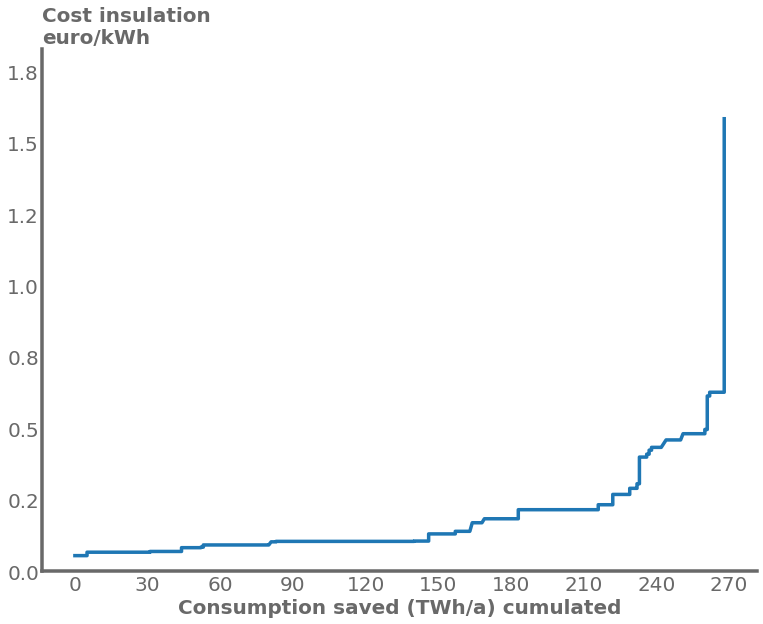

Consumption conventional initial: 351 TWh/a
Existing  Occupancy status  Income owner  Income tenant  Housing type   Heating system               Wall  Floor  Roof  Windows
True      Privately rented  C3            C3             Single-family  Electricity-Heat pump water  0.5   0.5    0.1   1.6        1.584408
                                          C4             Single-family  Electricity-Heat pump water  0.5   0.5    0.1   1.6        1.584408
                            C5            C3             Single-family  Electricity-Heat pump water  0.5   0.5    0.1   1.6        1.584408
                            C2            C2             Single-family  Electricity-Heat pump water  0.5   0.5    0.1   1.6        1.584408
                            C5            C2             Single-family  Electricity-Heat pump water  0.5   0.5    0.1   1.6        1.584408
          Owner-occupied    C1            C1             Single-family  Electricity-Heat pump water  0.5   0.5    0.1   1.6     

In [11]:
df = output['Max consumption saved']
df.drop(df[df['bill_saved'] == 0].index, inplace=True)
df['consumption_saved_sum'] = df['consumption_saved'] * discount_factor
df['consumption_saved_agg_sum'] = df['consumption_saved_agg'] * discount_factor
df['cost_consumption'] = df['cost'] / df['consumption_saved_sum']
print(df.columns)

x = (df['consumption_saved_agg'] / 10**9).rename('Consumption saved (TWh/a)')
y = df['cost_consumption'].rename('Cost insulation (euro/kWh)')
cumulated_plot(x, y, plot=True, format_y=lambda y, _: '{:,.1f}'.format(y))
result.update({'Max saving': cumulated_plot(x, y, plot=False, format_y=lambda y, _: '{:,.1f}'.format(y))})
print('Consumption conventional initial: {:,.0f} TWh/a'.format(output['Consumption before (kWh/segment)'].sum() / 10**9))

print(df['cost_consumption'].sort_values(ascending=False).head(10))

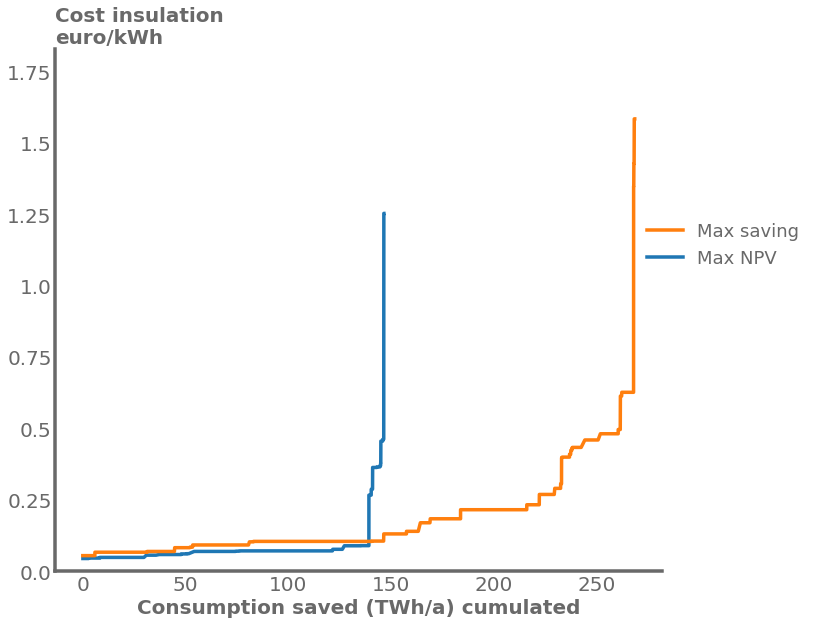

In [12]:
cumulated_plots(result, 'Cost insulation (euro/kWh)')

In [13]:
result

{'Max NPV': Consumption saved (TWh/a) cumulated
 0.054330      0.044773
 0.141832      0.044773
 0.271579      0.044773
 0.481949      0.044773
 0.508898      0.044773
                 ...   
 146.544310    1.253313
 146.544334    1.253313
 146.544361    1.253313
 146.544375    1.253313
 146.544528    1.253313
 Name: Cost insulation (euro/kWh), Length: 1400, dtype: float64,
 'Max saving': Consumption saved (TWh/a) cumulated
 0.000858      0.054851
 0.065500      0.054851
 0.094430      0.054851
 0.135384      0.054851
 0.211390      0.054851
                 ...   
 268.651543    1.584408
 268.653583    1.584408
 268.653909    1.584408
 268.657291    1.584408
 268.658743    1.584408
 Name: Cost insulation (euro/kWh), Length: 1715, dtype: float64}

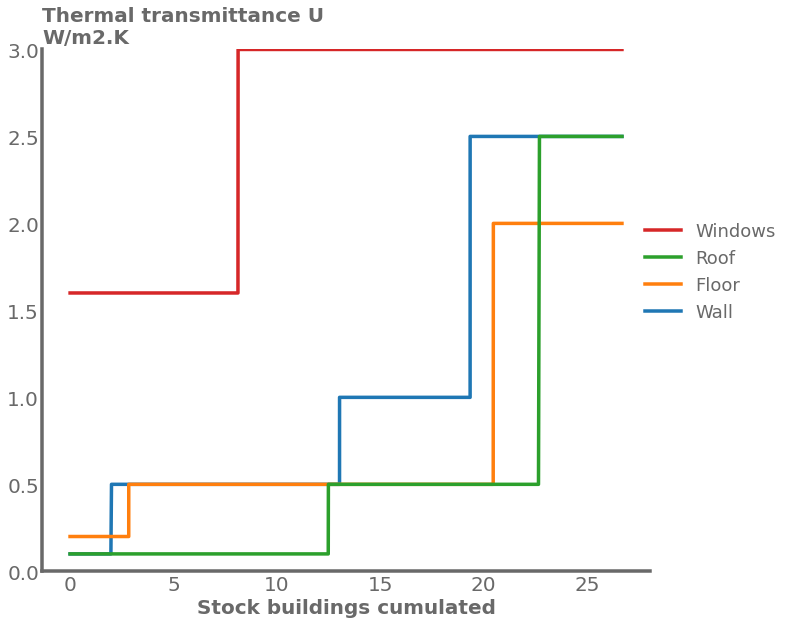

In [14]:
temp = dict()
for i in ['Wall', 'Floor', 'Roof', 'Windows']:
    y = Series(buildings.stock.index.get_level_values(i), index=buildings.stock.index, name='{} insulation (W/m2.K)'.format(i)).astype('float')
    x = buildings.stock / 10**6
    temp.update({i: cumulated_plot(x, y, plot=False)})
cumulated_plots(temp, 'Thermal transmittance U (W/m2.K)', ylim=3)


### Cost-efficiency of renovation measures

In [15]:
discount_rate = 0.04
discount_factor = (1 - (1 + discount_rate) ** -30) / discount_rate
print(discount_factor)

17.29203330066449


In [16]:
consumption_saved = output['Consumption saved (kWh/segment)']
cost_efficiency = output['Cost insulation (euro/dwelling)'] / (output['Consumption saved (kWh/dwelling)'] * discount_factor)
cost_efficiency.replace([inf, -inf], 0, inplace=True)
cost_efficiency.fillna(0, inplace=True)

In [17]:
temp, temp_percent, temp_stock = dict(), dict(), dict()
for key, item in insulation.items():
    x = consumption_saved.loc[:, item].rename('Consumption saved (TWh)') / 10**9
    x_percent = (consumption_saved.loc[:, item] / consumption_standard_before).rename('Consumption saved (%)')
    x_stock = buildings.stock / 10**6

    y = cost_efficiency.loc[:, item].rename('{} insulation'.format(key))

    temp.update({key: cumulated_plot(x, y, plot=False)})
    temp_percent.update({key: cumulated_plot(x_percent, y, plot=False)})
    temp_stock.update({key: cumulated_plot(x_stock, y, plot=False)})

NameError: name 'consumption_standard_before' is not defined

In [ ]:
cumulated_plots(temp, 'Cost (€/kWh)')
cumulated_plots(temp_percent, 'Cost (€/kWh)')
cumulated_plots(temp_stock, 'Cost (€/kWh)')

### Net present value assessment

In [ ]:
output.keys()

In [ ]:
discount_rate = 0.08
discount_factor = (1 - (1 + discount_rate) ** -30) / discount_rate
print(discount_factor)

In [ ]:
npv = output['Cost insulation (euro/dwelling)'] - output['Bill saved (euro/dwelling)'] * discount_factor

In [ ]:
i = 'Floor'
details = concat((output['Cost insulation (euro/dwelling)'].loc[:, insulation[i]], output['Bill saved (euro/dwelling)'].loc[:, insulation[i]] * discount_factor, npv.loc[:, insulation[i]].rename('NPV (euro/dwelling)')), axis=1).sort_values('NPV (euro/dwelling)')

In [ ]:
temp, temp_percent, temp_stock = dict(), dict(), dict()
for key, item in insulation.items():
    x = consumption_saved.loc[:, item].rename('Consumption saved (TWh)') / 10**9
    x_percent = (consumption_saved.loc[:, item] / consumption_standard_before).rename('Consumption saved (%)')
    x_stock = buildings.stock / 10**6

    y = npv.loc[:, item].rename('{} insulation'.format(key)) / 10**3

    temp.update({key: cumulated_plot(x, y, plot=False)})
    temp_percent.update({key: cumulated_plot(x_percent, y, plot=False)})
    temp_stock.update({key: cumulated_plot(x_stock, y, plot=False)})

In [ ]:
cumulated_plots(temp, 'NPV (Thousand euro/dwelling)', ymin=None)
cumulated_plots(temp_percent, 'NPV (Thousand euro/dwelling)', ymin=None)
cumulated_plots(temp_stock, 'NPV (Thousand euro/dwelling)', ymin=None)

#### Social assessment

In [ ]:
social_npv = output['Cost insulation (euro/dwelling)'] - (output['Bill saved (euro/dwelling)'] + output['Emission value saved (euro/dwelling)']) * discount_factor

In [ ]:
temp, temp_percent, temp_stock = dict(), dict(), dict()
for key, item in insulation.items():
    x = consumption_saved.loc[:, item].rename('Consumption saved (TWh)') / 10**9
    x_percent = (consumption_saved.loc[:, item] / consumption_standard_before).rename('Consumption saved (%)')
    x_stock = buildings.stock / 10**6

    y = social_npv.loc[:, item].rename('{} insulation'.format(key)) / 10**3

    temp.update({key: cumulated_plot(x, y, plot=False)})
    temp_percent.update({key: cumulated_plot(x_percent, y, plot=False)})
    temp_stock.update({key: cumulated_plot(x_stock, y, plot=False)})

In [ ]:
cumulated_plots(temp, 'NPV (Thousand euro/dwelling)', ymin=None)
cumulated_plots(temp_percent, 'NPV (Thousand euro/dwelling)', ymin=None)
cumulated_plots(temp_stock, 'NPV (Thousand euro/dwelling)', ymin=None)

### Marginal Energy Saving Cost Curves (MESC-Curves)
These curves show for each amount of energy demand savings (x-axis) the costs of the last renovation action to be taken to reach these savings (y-axis).

### Energy Saving Cost Curves (ESC-Curves)
These curves show for each amount of energy demand savings (x-axis) the average costs of all renovation actions to be implemented to reach these savings (y-axis).